## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date, time
import plotly.express as px

# Retrieving data

In [3]:
dataframe=pd.read_csv('../raw_data/london_real_estate_data.zip', compression='zip',
                dtype={'price': np.int32,'day':np.int16, 'month':np.int16,'year':np.int16}
)

In [138]:
dataframe.columns


Index(['price', 'date', 'postcode', 'property_type', 'property_age', 'ground',
       'number', 'additional_info', 'street', 'locality', 'town', 'district',
       'county', 'year', 'month', 'day'],
      dtype='object')

## Building function to tidy df

In [4]:
def tidy_df(df):
    ''' takes london re data df and deletes locality, town, county columns, 
    merges number and additional info to create new column and deleting the former individual ones,
    and renames district column to borough.'''
    # replace nan values w empty strings
    df.fillna({'additional_info':''}, inplace=True)

    # merging number and additional number
    df['full_property_number']=df['number']+ '' + df['additional_info']
    
    # dropping columns
    df.drop(columns=['number', 'additional_info', 'locality','town','county'], inplace=True)

    df.rename(columns={'district':'borough'}, inplace=True)

    # dropping rows where 'type'=='O'
    df=df[df['property_type']!='O']

    # dropping rows where 'ground' == 'U'
    df=df[df['ground']!='U']
    
    return df

df=tidy_df(dataframe)
df.tail()

,price,date,postcode,property_type,property_age,ground,street,borough,year,month,day,full_property_number
3623314,1180000,23-01-06 00:00,W12 7GR,F,N,L,WOOD CRESCENT,HAMMERSMITH AND FULHAM,2023,1,6,5APARTMENT 106
3623315,365000,23-01-11 00:00,E4 9QB,F,N,L,CASTLE AVENUE,WALTHAM FOREST,2023,1,11,BAILEY COURT6
3623316,370000,23-01-17 00:00,RM6 6SX,S,N,F,HENLEY GARDENS,BARKING AND DAGENHAM,2023,1,17,12
3623317,310000,23-01-06 00:00,E4 9SY,F,N,L,NEW ROAD,WALTHAM FOREST,2023,1,6,108B
3623318,490000,23-01-13 00:00,RM1 4SR,T,N,F,HEATHER GLEN,HAVERING,2023,1,13,12


In [ ]:
def feature_engineer(df):
    ''' taking dataframe and adding new columns:
    - 2 and 3 chars shortened postcodes,
    - sin cos for months
    returns df'''

    # shortened postcodes
    df['short2_pc']=df[['postcode']].apply(lambda x: x.str[:2])
    df['short3_pc']=df[['postcode']].apply(lambda x: x.str[:3])

    # can drop postcode now? not needed for analysis
    # df.drop(columns='postcode', inplace=True)

    return df

df= feature_engineer(df)
df.head()

In [70]:
df.dtypes

price                    int32
date                    object
postcode                object
property_type           object
property_age            object
ground                  object
street                  object
borough                 object
year                     int16
month                    int16
day                      int16
full_property_number    object
short2_pc               object
short3_pc               object
dtype: object

In [ ]:
df.shape

(3566539, 12)

In [108]:
df.columns

Index(['price', 'date', 'postcode', 'property_type', 'property_age', 'ground',
       'street', 'borough', 'year', 'month', 'day', 'full_property_number'],
      dtype='object')

# Exploring Columns

## Irrelevant columns - locality - town

In [13]:
df['locality'].value_counts()

locality
LONDON              898451
ILFORD               31574
ENFIELD              30275
ROMFORD              26937
HARROW               26358
                     ...  
EAST END ROAD            1
WATERWORKS ROAD          1
CHART STREET             1
STATION APPROACH         1
LLANOVER ROAD            1
Name: count, Length: 666, dtype: int64

In [14]:
df['town'].value_counts()

town
LONDON              2162986
ROMFORD               73399
CROYDON               67341
ILFORD                64786
ENFIELD               61670
                     ...   
NEWPORT                   1
SUTTON COLDFIELD          1
WARRINGTON                1
WALTHAM ABBEY             1
NORTHWICH                 1
Name: count, Length: 94, dtype: int64

In [15]:
df['town'].unique()

array(['BECKENHAM', 'LONDON', 'NORTHOLT', 'ILFORD', 'SUTTON', 'UXBRIDGE',
       'CARSHALTON', 'ENFIELD', 'DAGENHAM', 'CROYDON', 'THORNTON HEATH',
       'MITCHAM', 'ROMFORD', 'RICHMOND', 'WEST DRAYTON', 'BELVEDERE',
       'GREENFORD', 'HAYES', 'ORPINGTON', 'BROMLEY', 'ERITH', 'PURLEY',
       'STANMORE', 'SOUTH CROYDON', 'HARROW', 'BARNET', 'SURBITON',
       'HORNCHURCH', 'TEDDINGTON', 'EDGWARE', 'HOUNSLOW', 'WEMBLEY',
       'BEXLEYHEATH', 'ISLEWORTH', 'DARTFORD', 'TWICKENHAM', 'NEW MALDEN',
       'PINNER', 'HAMPTON', 'WALLINGTON', 'FELTHAM', 'SIDCUP', 'WELLING',
       'COULSDON', 'WOODFORD GREEN', 'MORDEN', 'RAINHAM', 'NORTHWOOD',
       'WEST WICKHAM', 'SOUTHALL', 'KINGSTON UPON THAMES', 'BARKING',
       'KENLEY', 'UPMINSTER', 'WORCESTER PARK', 'BEXLEY', 'CHESSINGTON',
       'CHIGWELL', 'CHISLEHURST', 'RUISLIP', 'KESTON', 'WESTERHAM',
       'BRENTFORD', 'WHYTELEAFE', 'BUCKHURST HILL', 'EAST MOLESEY',
       'BANSTEAD', 'WARLINGHAM', 'EPSOM', 'WALTHAM CROSS', 'CATERHAM',
    

In [18]:
len(df['district'].unique())

33

In [21]:
df.drop(columns=['town','locality','county'], inplace=True)

## Exploring property type

In [22]:
# inspecting property types, F = flat, T=Terraced property, S= semi-detached house, D=detached house, O= other
df.property_type.value_counts()


property_type
F    1827792
T    1041668
S     537157
D     160014
O      56688
Name: count, dtype: int64

In [35]:
df.property_type.nunique()

5

In [83]:
len(df[df['property_type']=="O"])/len(df)

0.015645324079938863

## Exploring Ground - Freehold Leasehold

In [102]:
df.ground.value_counts()

ground
L    1886861
F    1736366
U         92
Name: count, dtype: int64

In [34]:
df.ground.nunique()

3

In [103]:
df[df['ground']=='U']

,price,date,postcode,property_type,property_age,ground,street,borough,year,month,day,full_property_number
1858,42016,95-01-30 00:00,SW4 9NG,F,N,U,ABBEVILLE ROAD,LAMBETH,1995,1,30,40
26457,75000,95-08-25 00:00,SE12 9JB,S,N,U,PITFOLD ROAD,LEWISHAM,1995,8,25,67
108643,87995,95-12-18 00:00,CR4 2AR,S,Y,U,KENNEDY CLOSE,MERTON,1995,12,18,13
749446,172000,00-10-16 00:00,EN4 8LA,S,N,U,FERNEY ROAD,BARNET,2000,10,16,49
806192,420000,00-09-21 00:00,SM5 2TG,D,N,U,WESTCROFT ROAD,SUTTON,2000,9,21,37
...,...,...,...,...,...,...,...,...,...,...,...,...
1730148,249950,06-06-28 00:00,BR3 5LP,F,Y,U,ALBEMARLE ROAD,BROMLEY,2006,6,28,"LAIT HOUSE, 1FLAT 117"
1730220,298700,06-11-22 00:00,IG11 8PG,T,Y,U,PICKERING ROAD,BARKING AND DAGENHAM,2006,11,22,13
1759807,298750,06-10-05 00:00,IG11 8PG,T,Y,U,PICKERING ROAD,BARKING AND DAGENHAM,2006,10,5,7
1811677,298750,06-11-30 00:00,IG11 8PG,T,Y,U,PICKERING ROAD,BARKING AND DAGENHAM,2006,11,30,9


In [86]:
len(df[df['ground']=="U"])/len(df)

2.5391084803739333e-05

## Exploring Property Age

In [27]:
df.property_age.value_counts()

property_age
N    3290439
Y     332880
Name: count, dtype: int64

In [33]:
df.property_age.nunique()

2

## Exploring 'additional info'

In [39]:
df.additional_info.nunique()

19480

In [48]:
# proportion of missing values
sum(df['additional_info'].isnull()==True)/len(df)

0.6746212519515946

In [ ]:
df[df['additional_info'].isnull()==False]

In [65]:
# replacing nan values with empty string, so can merge  with number

df.fillna({'additional_info':''}, inplace=True)

# merging  number and additional number
df['full_property_number']=df['number']+ '' + df['additional_info']

# dropping number and additional info column
df=df.drop(columns=['number', 'additional_info'])
df.tail(100)                        

,price,date,postcode,property_type,property_age,ground,street,district,year,month,day,full_property_number
3623219,450000,23-01-10 00:00,UB7 9EX,T,N,F,BLACKTHORN AVENUE,HILLINGDON,2023,1,10,48
3623220,425000,23-01-05 00:00,W4 2HD,F,N,L,DEVONSHIRE ROAD,HOUNSLOW,2023,1,5,2E
3623221,265000,23-01-27 00:00,EN5 1QU,F,N,L,STATION ROAD,BARNET,2023,1,27,"COLERIDGE COURT, 81FLAT 18"
3623222,465000,23-01-20 00:00,W7 2AZ,F,N,L,WELLMEADOW ROAD,EALING,2023,1,20,INSPIRE COURTFLAT 6
3623223,359000,23-01-31 00:00,UB8 2SP,F,N,L,WATERLOO ROAD,HILLINGDON,2023,1,31,"BLYTHE WOOD COURT, 14412"
...,...,...,...,...,...,...,...,...,...,...,...,...
3623314,1180000,23-01-06 00:00,W12 7GR,F,N,L,WOOD CRESCENT,HAMMERSMITH AND FULHAM,2023,1,6,5APARTMENT 106
3623315,365000,23-01-11 00:00,E4 9QB,F,N,L,CASTLE AVENUE,WALTHAM FOREST,2023,1,11,BAILEY COURT6
3623316,370000,23-01-17 00:00,RM6 6SX,S,N,F,HENLEY GARDENS,BARKING AND DAGENHAM,2023,1,17,12
3623317,310000,23-01-06 00:00,E4 9SY,F,N,L,NEW ROAD,WALTHAM FOREST,2023,1,6,108B


 ## Exploring postcodes

In [67]:
df.postcode.value_counts()

postcode
E14 9GU     442
WC2A 2AT    322
W2 6HP      305
N7 6JT      303
CR4 4FD     303
           ... 
W1D 7AT       1
NW4 2DF       1
W1B 1NH       1
SW5 0QY       1
SW15 4BG      1
Name: count, Length: 140532, dtype: int64

## Exploring sales over time

In [89]:
median_annual_price=df.groupby(['year']).median('price')
median_annual_price
# df.groupby(['year', 'month']).median('price')
# visualise only monthly sales data or even annual sales data

,price,month,day
year,,,
1995,72995.0,7.0,19.0
1996,77000.0,7.0,19.0
1997,86000.0,7.0,18.0
1998,96545.0,7.0,18.0
1999,118000.0,7.0,17.0
2000,138000.0,6.0,18.0
2001,155000.0,7.0,17.0
2002,180500.0,7.0,17.0
2003,200000.0,7.0,17.0


<Axes: xlabel='year', ylabel='price'>

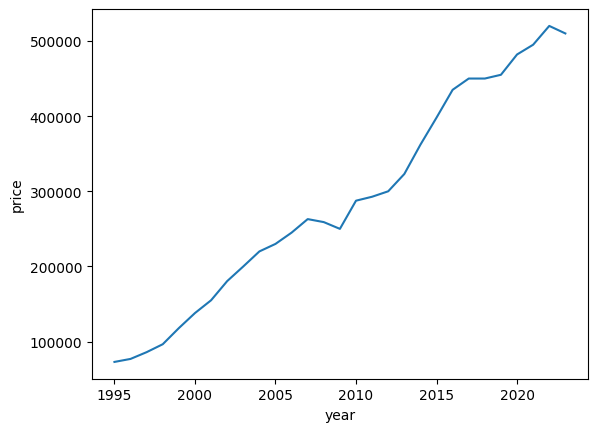

In [92]:
# Plotting annual median sales price 
sn.lineplot(median_annual_price['price'])

## Exploring price outliers

In [115]:
# amount of properties (in overall dataset) with price ABOVE ..... e.g 40M=27, 30M = 70, 
len(df[df['price']>=20_000_000])

223

In [5]:
# amount of properties (in overall dataset) with price BELOW ..... e.g 50T=100T (half of which take place in 1995/96, 100T = 70, 
len(df[df['price']<=50_000])

99554

In [24]:

# examining price & sales year
# half the sales <50k, take place in 95 and 96
# 28k since 98, 14k since 99, 36 since 2000

tmp=df[(df['price']<=50_000) & (df['year']> 2000)]
len(tmp)

3657

## Exploring postcodes

In [26]:
# postcodes with NAN value
df.postcode.isnull().sum()

2998

In [35]:
df[df['postcode'].isnull()==True]
# same formula below
#df[df['postcode'].isna()]

,price,date,postcode,property_type,property_age,ground,street,borough,year,month,day,full_property_number
2355,89000,95-08-04 00:00,NaN,F,N,L,CLAVERTON STREET,CITY OF WESTMINSTER,1995,8,4,38FIRST FLOOR FLAT
2772,71500,95-06-23 00:00,NaN,F,N,L,FOYLE ROAD,GREENWICH,1995,6,23,46FLAT 1
3599,72500,95-05-24 00:00,NaN,F,N,L,PLOUGH MEWS,WANDSWORTH,1995,5,24,8A
3973,88000,95-09-08 00:00,NaN,F,N,L,MONNERY ROAD,ISLINGTON,1995,9,8,7SECOND AND THIRD FLOOR FLAT
4028,165000,95-11-15 00:00,NaN,F,N,L,CHARLWOOD STREET,CITY OF WESTMINSTER,1995,11,15,27UNIT 3
...,...,...,...,...,...,...,...,...,...,...,...,...
3593914,2996000,22-10-31 00:00,NaN,D,N,F,GOLDHAWK ROAD,HAMMERSMITH AND FULHAM,2022,10,31,298
3599218,335000,22-11-21 00:00,NaN,F,N,L,LEADEN HILL,CROYDON,2022,11,21,WYNNE HOUSEFLAT 13
3603969,520000,22-12-02 00:00,NaN,F,N,L,LEA BRIDGE ROAD,WALTHAM FOREST,2022,12,2,"FREYA COURT, 16211"
3605261,308000,22-09-21 00:00,NaN,F,N,L,HERMON HILL,REDBRIDGE,2022,9,21,4FLAT


In [67]:
# let's explore how many unique postcodes per borough typically

df.groupby('borough').nunique()['postcode']

borough
BARKING AND DAGENHAM      2589
BARNET                    7330
BEXLEY                    3853
BRENT                     4753
BROMLEY                   6277
CAMDEN                    4231
CITY OF LONDON             282
CITY OF WESTMINSTER       5597
CROYDON                   6122
EALING                    5253
ENFIELD                   5372
GREENWICH                 4141
HACKNEY                   3413
HAMMERSMITH AND FULHAM    2840
HARINGEY                  3671
HARROW                    4305
HAVERING                  4268
HILLINGDON                5042
HOUNSLOW                  3919
ISLINGTON                 3459
KENSINGTON AND CHELSEA    3281
KINGSTON UPON THAMES      2916
LAMBETH                   4945
LEWISHAM                  4196
MERTON                    3105
NEWHAM                    3397
REDBRIDGE                 4044
RICHMOND UPON THAMES      3802
SOUTHWARK                 4599
SUTTON                    3397
TOWER HAMLETS             3845
WALTHAM FOREST            3160


In [68]:
# explore shortened postcodes
# could use this to assign a 2n short postcode to Nan values based on borough
df.groupby('borough').nunique()['short2_pc']

borough
BARKING AND DAGENHAM       6
BARNET                    18
BEXLEY                     5
BRENT                     10
BROMLEY                    8
CAMDEN                    12
CITY OF LONDON             9
CITY OF WESTMINSTER       11
CROYDON                    9
EALING                    16
ENFIELD                   19
GREENWICH                  8
HACKNEY                   16
HAMMERSMITH AND FULHAM     9
HARINGEY                  21
HARROW                    10
HAVERING                  10
HILLINGDON                18
HOUNSLOW                  19
ISLINGTON                 14
KENSINGTON AND CHELSEA     7
KINGSTON UPON THAMES       7
LAMBETH                    6
LEWISHAM                   6
MERTON                     6
NEWHAM                     9
REDBRIDGE                 10
RICHMOND UPON THAMES       4
SOUTHWARK                  6
SUTTON                     9
TOWER HAMLETS             12
WALTHAM FOREST            14
WANDSWORTH                 5
Name: short2_pc, dtype: int64

In [69]:
# explore shortened postcodes
df.groupby('borough').nunique()['short3_pc']

borough
BARKING AND DAGENHAM      21
BARNET                    46
BEXLEY                    17
BRENT                     24
BROMLEY                   21
CAMDEN                    30
CITY OF LONDON            13
CITY OF WESTMINSTER       39
CROYDON                   26
EALING                    40
ENFIELD                   45
GREENWICH                 16
HACKNEY                   24
HAMMERSMITH AND FULHAM    16
HARINGEY                  47
HARROW                    29
HAVERING                  24
HILLINGDON                43
HOUNSLOW                  39
ISLINGTON                 19
KENSINGTON AND CHELSEA    14
KINGSTON UPON THAMES      19
LAMBETH                   12
LEWISHAM                  16
MERTON                    11
NEWHAM                    23
REDBRIDGE                 30
RICHMOND UPON THAMES      16
SOUTHWARK                 13
SUTTON                    27
TOWER HAMLETS             18
WALTHAM FOREST            28
WANDSWORTH                12
Name: short3_pc, dtype: int64

## Exploring sampled data

In [127]:
file='../raw_data/london_real_estate_data.zip'
df_sample=pd.read_csv(file,
                compression='zip',
                dtype={'price': np.int32,'day':np.int16, 'month':np.int16,'year':np.int16}).sample(350_000,random_state=42)

In [24]:
df_sample=tidy_df(df_sample)

In [25]:
df_sample=df_sample.sort_values(by='date', ascending=True)

In [101]:
# QUESTION: shows yearly mean (!) sales and confidence interval per borough. 

# sn.lineplot(x='year', y='price', hue='borough', data=df_sample)

In [102]:
# shows yearly avg sales per month
# sn.lineplot(x='year', y='price', style='month', data=df_sample, legend='full')
# plt.set_ylim(1000,10_000)

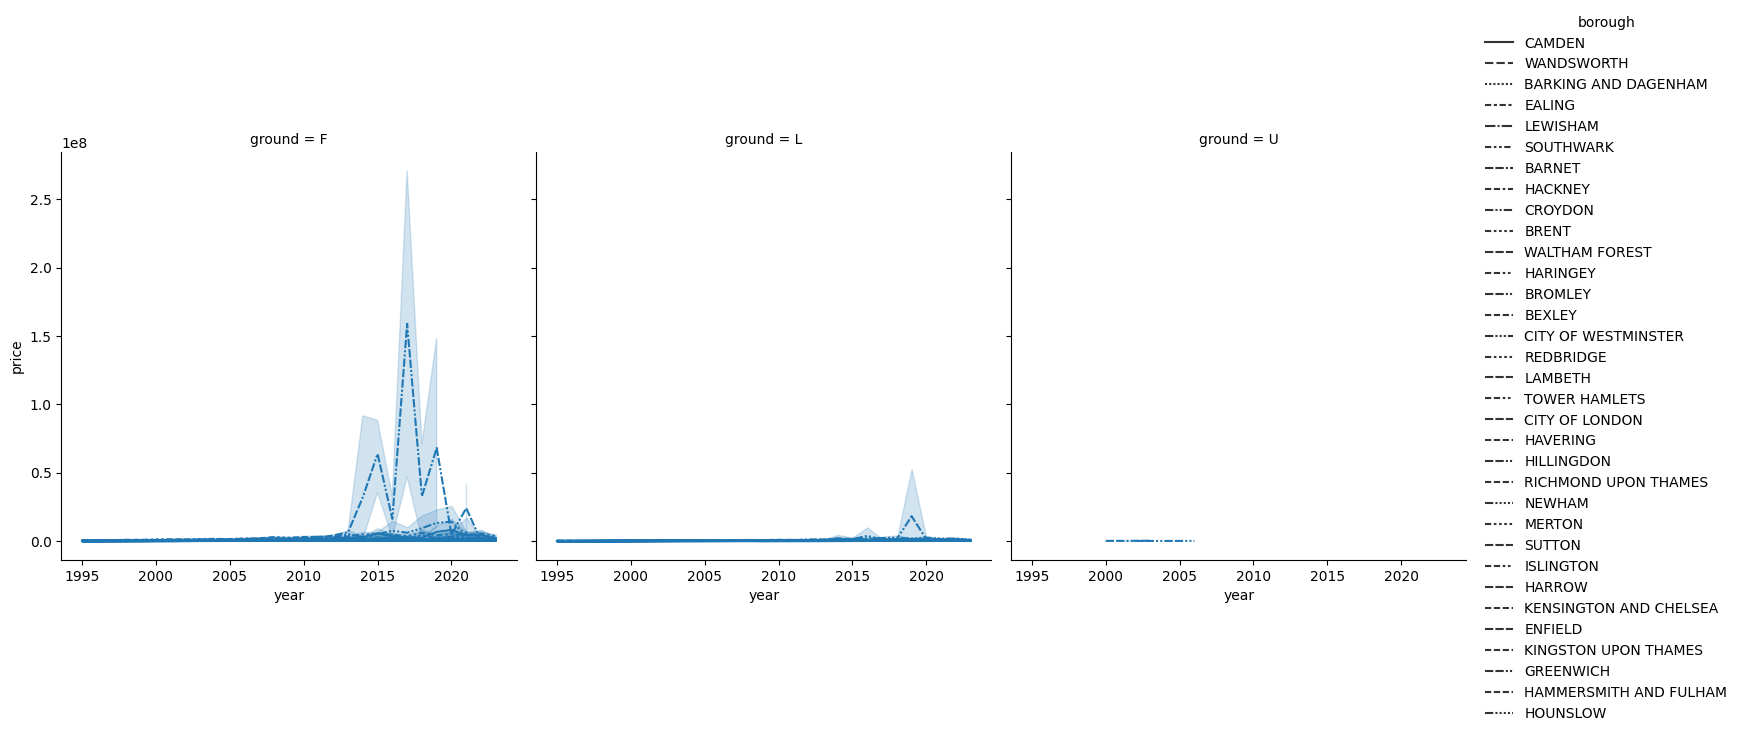

In [74]:
sn.relplot(
    data=df_sample, x="year", y="price",
    col="ground", style="borough",
    kind="line"
)

<Axes: >

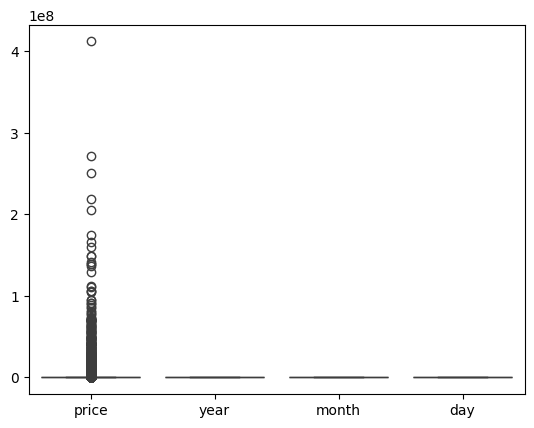

In [57]:
sn.boxplot(df_sample)

## Inspecting price outliers

In [67]:
# If not using timeline but RNN to predict, better to NOT use house prices before 2008?

# Other "O" being mainly garages... or old sales prices

df_sample[(df_sample['price']<=1000) & (df_sample['property_type']!='O')]

,price,date,postcode,property_type,property_age,ground,street,borough,year,month,day,full_property_number
2707081,1000,15-03-24 00:00,E7 0DR,T,N,F,DAMES ROAD,NEWHAM,2015,3,24,57C - 57D
80287,600,95-01-27 00:00,SW6 2PF,T,N,F,STEPHENDALE ROAD,HAMMERSMITH AND FULHAM,1995,1,27,50
79451,100,95-01-31 00:00,SM3 9TR,T,N,F,BUXTON CRESCENT,SUTTON,1995,1,31,77
102657,480,95-04-01 00:00,SW12 0BN,T,N,F,CAVENDISH ROAD,LAMBETH,1995,4,1,117
66252,300,95-04-18 00:00,SE23 3TQ,S,N,F,DEVONSHIRE ROAD,LEWISHAM,1995,4,18,214A
104891,800,95-06-15 00:00,HA1 1RY,T,N,F,RADNOR ROAD,HARROW,1995,6,15,3
95479,450,95-08-11 00:00,W12 9BY,T,N,F,GAYFORD ROAD,HAMMERSMITH AND FULHAM,1995,8,11,77
103955,1000,95-08-31 00:00,KT2 6BP,S,N,F,AUDRIC CLOSE,KINGSTON UPON THAMES,1995,8,31,32
78933,750,95-10-11 00:00,NW11 6HA,D,N,F,ERSKINE HILL,BARNET,1995,10,11,3
78106,500,95-11-06 00:00,SM4 4HX,T,N,F,GREENWOOD CLOSE,MERTON,1995,11,6,20


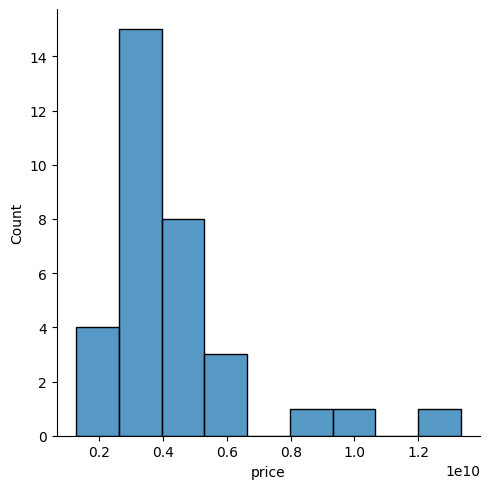

In [33]:
sn.displot(borough_table)

In [43]:
borough_recent=df_sample[df_sample['year']>2011].groupby('borough').median()['price'].sort_values(ascending=False)
borough_recent

TypeError: agg function failed [how->median,dtype->object]

# FEATURE ENGINEERING

## Extract first 2 & 3 lines of postcode

In [62]:
# ignores nan values (considered float)
df['short2_pc']=df[['postcode']].apply(lambda x: x.str[:2])

In [63]:
# check how many unique shortened postcodes we now have
df['short2_pc'].nunique()

51

In [56]:
df.head()

,price,date,postcode,property_type,property_age,ground,street,borough,year,month,day,full_property_number,short2_pc
0,62750,95-10-02 00:00,BR3 4AT,T,N,F,EDEN ROAD,BROMLEY,1995,10,2,56,BR3 4AT
1,78000,95-09-29 00:00,SW16 3BL,S,N,F,GREEN LANE,CROYDON,1995,9,29,208,SW16 3BL
2,51000,95-10-31 00:00,UB5 5LH,S,N,F,BENGARTH ROAD,EALING,1995,10,31,57,NaN
3,405000,95-04-07 00:00,N1 2JU,S,N,F,CANONBURY PARK NORTH,ISLINGTON,1995,4,7,49,NaN
4,60000,95-12-21 00:00,IG1 1PP,T,N,F,HAMPTON ROAD,REDBRIDGE,1995,12,21,209,NaN


In [60]:
df['short3_pc']=df[['postcode']].apply(lambda x: x.str[:3])

In [64]:
# check how many unique shortened postcodes we now have
df['short3_pc'].nunique()

210

In [51]:
# columns to scale:
# target : price (= y, will need to separate from feature list)
# features: month, year, sin, cos

'N1'

In [71]:
df.columns

Index(['price', 'date', 'postcode', 'property_type', 'property_age', 'ground',
       'street', 'borough', 'year', 'month', 'day', 'full_property_number',
       'short2_pc', 'short3_pc'],
      dtype='object')

## Exploring Street vs Postcode

In [76]:
# exploring unique postcodes  (+ ca. 3000 nans)
df['postcode'].nunique()

134347

In [75]:
# exploring unique street names  (+ ca. 3000 nans)
df['street'].nunique()

37688

# Reducing features

In [80]:
df.dropna(axis=0, how='any')

,price,date,postcode,property_type,property_age,ground,street,borough,year,month,day,full_property_number,short2_pc,short3_pc
0,62750,95-10-02 00:00,BR3 4AT,T,N,F,EDEN ROAD,BROMLEY,1995,10,2,56,BR,BR3
1,78000,95-09-29 00:00,SW16 3BL,S,N,F,GREEN LANE,CROYDON,1995,9,29,208,SW,SW1
2,51000,95-10-31 00:00,UB5 5LH,S,N,F,BENGARTH ROAD,EALING,1995,10,31,57,UB,UB5
3,405000,95-04-07 00:00,N1 2JU,S,N,F,CANONBURY PARK NORTH,ISLINGTON,1995,4,7,49,N1,N1
4,60000,95-12-21 00:00,IG1 1PP,T,N,F,HAMPTON ROAD,REDBRIDGE,1995,12,21,209,IG,IG1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3623314,1180000,23-01-06 00:00,W12 7GR,F,N,L,WOOD CRESCENT,HAMMERSMITH AND FULHAM,2023,1,6,5APARTMENT 106,W1,W12
3623315,365000,23-01-11 00:00,E4 9QB,F,N,L,CASTLE AVENUE,WALTHAM FOREST,2023,1,11,BAILEY COURT6,E4,E4
3623316,370000,23-01-17 00:00,RM6 6SX,S,N,F,HENLEY GARDENS,BARKING AND DAGENHAM,2023,1,17,12,RM,RM6
3623317,310000,23-01-06 00:00,E4 9SY,F,N,L,NEW ROAD,WALTHAM FOREST,2023,1,6,108B,E4,E4


In [83]:
tmp=df.drop(columns=['borough','street','day','full_property_number','short2_pc','short3_pc'])
tmp.head()

,price,date,postcode,property_type,property_age,ground,year,month
0,62750,95-10-02 00:00,BR3 4AT,T,N,F,1995,10
1,78000,95-09-29 00:00,SW16 3BL,S,N,F,1995,9
2,51000,95-10-31 00:00,UB5 5LH,S,N,F,1995,10
3,405000,95-04-07 00:00,N1 2JU,S,N,F,1995,4
4,60000,95-12-21 00:00,IG1 1PP,T,N,F,1995,12


In [129]:
tmp.dropna(axis=0,how='any', inplace=True)
tmp=tmp[tmp['property_type']!='O']
tmp=tmp[tmp['ground']!='U']

In [91]:
tmp.head()

,price,date,postcode,property_type,property_age,ground,year,month
0,62750,95-10-02 00:00,BR3 4AT,T,N,F,1995,10
1,78000,95-09-29 00:00,SW16 3BL,S,N,F,1995,9
2,51000,95-10-31 00:00,UB5 5LH,S,N,F,1995,10
3,405000,95-04-07 00:00,N1 2JU,S,N,F,1995,4
4,60000,95-12-21 00:00,IG1 1PP,T,N,F,1995,12


In [111]:
df=pd.DataFrame(tmp)
# exploring amount of flats w prices above 10M (a lot of historic data)
len(df[df['price']>10_000_000])

1218

In [128]:
# exploring amount of flats w prices below 200k (a lot of historic data)
len(df[df['price']<200_000])

1390721

# Using formulas to retrieve and clean data

In [4]:
def load_csv():
    ''' loads london csv file from raw_data folder '''
    file='../raw_data/london_real_estate_data.zip'
    df=pd.read_csv(file,
                compression='zip',
                dtype={'price': np.int32,'day':np.int16, 'month':np.int16,'year':np.int16}
    )
    return df

# columns of tidy_df= ['price', 'date', 'postcode', 'property_type', 'property_age', 'ownership',
#     'year', 'month']

def tidy_df(df: pd.DataFrame) -> pd.DataFrame:
    '''
    takes london re df and deletes all columns not needed as features for model,
    merges number and additional info to create new column and deleting the former individual ones,
    and renames various columns.
    '''

    # replace nan values w empty strings
    df.fillna({'additional_info':''}, inplace=True)
    
    # merging number and additional number
    df['full_property_number']=df['number']+ '' + df['additional_info']

    df.rename(columns={'district':'borough', 'ground':'ownership'}, inplace=True)

    # dropping columns
    df.drop(columns=['day', 'number', 'street', 'additional_info',\
        'full_property_number', 'borough', 'locality','town','county'], inplace=True)

    # drop rows with NaN (3000 in postcode)
    df.dropna(axis=0, how='any', inplace=True)

    # dropping rows where 'type'=='O'
    df=df[df['property_type']!='O']

    # dropping rows where 'ownership' == 'U'
    df=df[df['ownership']!='U']

    return df

In [5]:
df=load_csv()

In [6]:
df=tidy_df(df)

In [8]:
df.shape

(3563541, 8)

In [10]:
df.isna().sum()

price            0
date             0
postcode         0
property_type    0
property_age     0
ownership        0
year             0
month            0
dtype: int64

## Plotting distribution of prices (histogram)

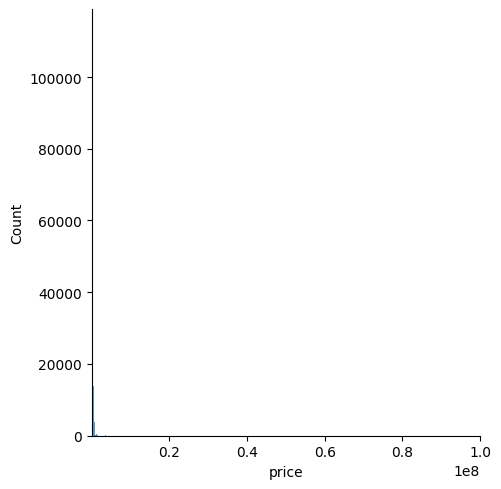

In [16]:
sns.displot(data=df, x='price')
#plt.ylim(5000,00_000)
plt.xlim(50_000,100_000_000)
plt.show()

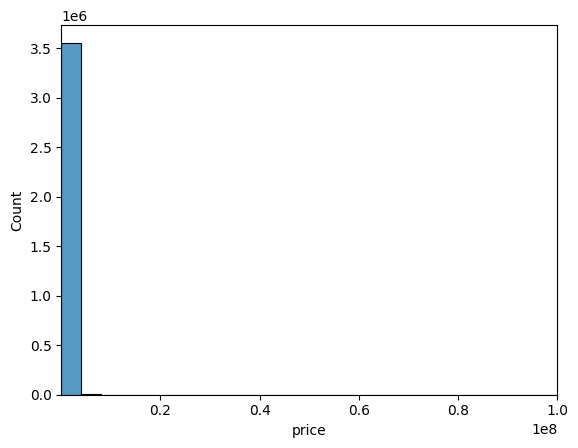

In [20]:
sns.histplot(data=df, x='price', bins=40)
#plt.ylim(5000,500_000)
plt.xlim(30_000,100_000_000)
plt.show()

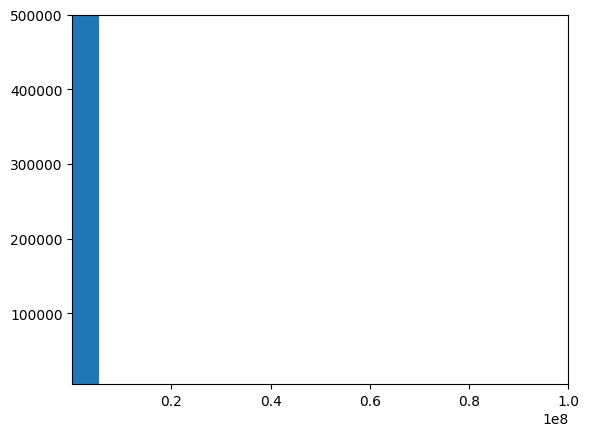

In [12]:
plt.hist(df['price'], bins=30)
plt.ylim(5000,500_000)
plt.xlim(50_000,100_000_000)
plt.show()

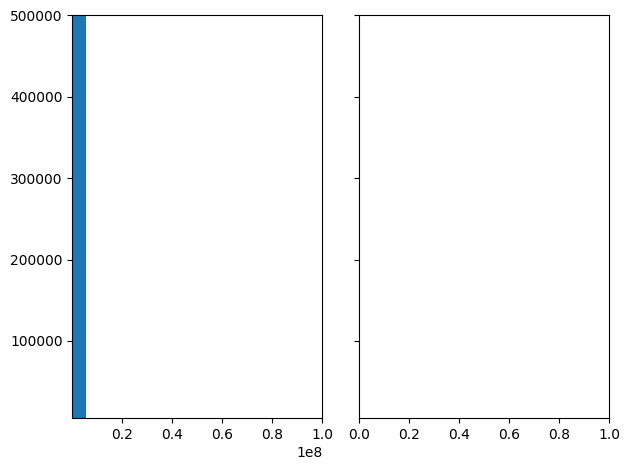

In [138]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(df['price'], bins=30)
#axs[1].hist(dist2, bins=30)
axs[0].set_ylim(5000,500_000)
axs[0].set_xlim(50_000,100_000_000)
plt.show()

In [13]:
fig = px.histogram(df, x="price")
fig.show()

ModuleNotFoundError: No module named 'tenacity.asyncio'